<h1><center>HW 3: Build Twitter Networks</center></h1>

### Q1. Scrape the follower-followee network by companies.
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy as tw
import datetime
import time


In [2]:
# I have erased my keys & tokens
CONSUMER_KEY=
ACCESS_KEY=
ACCESS_SECRET=
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tw.API(auth, wait_on_rate_limit=True, retry_count=5, retry_delay=10)

In [3]:
# define your function here

def get_follow(accounts):
    dogs = accounts
    cats = accounts.copy()
    
    data = pd.DataFrame(columns=dogs, index=cats)
    for dog in dogs:
        for cat in cats:
            friendship = api.get_friendship(source_screen_name=dog, target_screen_name=cat)
            data[dog][cat] = friendship[0].following
    
    return data

In [4]:
accounts=['walmart',
 'tysonfoods',
 'republicservice',
 'onsemi',
 'amkortechnology',
 'cbre',
 'smartfinal',
 'google',
 'ebay',
 'intuit',
 'intel',
 'paypal',
 'oracle',
 'netflix',
  'target']

result = get_follow(accounts)
result

Rate limit reached. Sleeping for: 872


,walmart,tysonfoods,republicservice,onsemi,amkortechnology,cbre,smartfinal,google,ebay,intuit,intel,paypal,oracle,netflix,target
walmart,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
tysonfoods,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
republicservice,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
onsemi,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
amkortechnology,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
cbre,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
smartfinal,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
google,False,True,True,False,False,True,False,False,True,True,True,False,False,False,True
ebay,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
intuit,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [37]:
# Leaving the examples here
# test the function with the list of accounts

accounts=['walmart',
 'tysonfoods',
 'republicservice',
 'onsemi',
 'amkortechnology',
 'cbre',
 'smartfinal',
 'google',
 'ebay',
 'intuit',
 'intel',
 'paypal',
 'oracle',
 'netflix',
  'target']

get_follow(accounts)

Rate limit reached. Sleeping for: 717


,walmart,tysonfoods,republicservice,onsemi,amkortechnology,cbre,smartfinal,google,ebay,intuit,intel,paypal,oracle,netflix,target
walmart,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
tysonfoods,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
republicservice,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
onsemi,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
amkortechnology,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
cbre,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
smartfinal,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
google,False,True,True,False,False,True,False,False,True,True,True,False,False,False,True
ebay,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
intuit,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Q2. Build a directed network with the data you just scraped.
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the indegree centrality and structural hole (you can use constraint). 
    * Sort these nodes by indegree centrality and print the top one account.
    * Sort these nodes by structural hole and print the top one account. 
    * Note the NA values in constraint measures. Also note the relation between structural hole and constraint.

In [5]:
# Build a network from the adjacency matrix

# add your code here

df = result*1
df

,walmart,tysonfoods,republicservice,onsemi,amkortechnology,cbre,smartfinal,google,ebay,intuit,intel,paypal,oracle,netflix,target
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
republicservice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
onsemi,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
amkortechnology,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
cbre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
smartfinal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
google,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1
ebay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
intuit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
# Arrange dataframe in adjacent matrix format，otherwise it returns error
matrix = []
for i in range(len(df)):
    matrix.append(df.loc[df.index[i]].values.tolist())
np_matrix = np.array(matrix)

df2 = pd.DataFrame(np_matrix)
G = nx.convert_matrix.from_pandas_adjacency(df2, create_using=nx.DiGraph())
print(nx.info(G))

DiGraph with 15 nodes and 27 edges


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

(-1.2009815705603601,
 1.209143045166369,
 -0.9296342477802748,
 1.135240478101184)

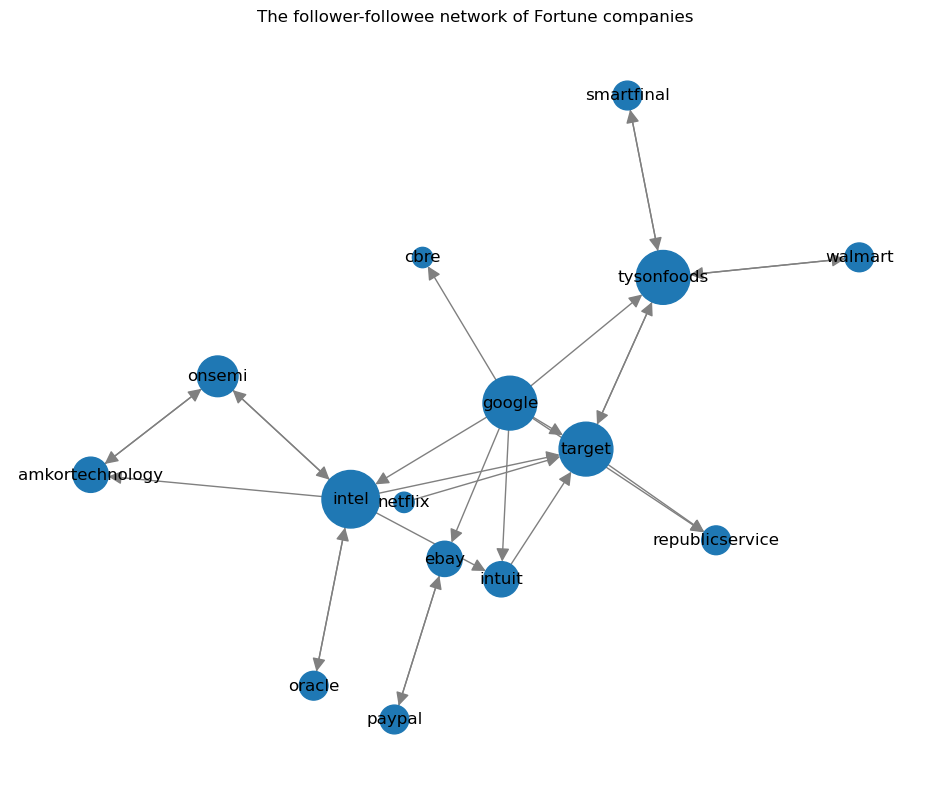

In [7]:
label_mapping = {idx: val for idx, val in enumerate(df.columns)}
G = nx.relabel_nodes(G, label_mapping)

figure(figsize=(12, 10), dpi=100)

nx.drawing.nx_pylab.draw_networkx(G,node_size=[x * 3000 for x in nx.degree_centrality(G).values()], 
                                  pos=nx.kamada_kawai_layout(G),
                                  arrowsize=20,
                                  edge_color="grey",
                                  )
plt.title('The follower-followee network of Fortune companies')
plt.axis("off") 
plt.show()

,walmart,tysonfoods,republicservice,onsemi,amkortechnology,cbre,smartfinal,google,ebay,intuit,intel,paypal,oracle,netflix,target
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
republicservice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
onsemi,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
amkortechnology,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
cbre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
smartfinal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
google,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1
ebay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
intuit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune companies')

(-1.2009815705603601,
 1.209143045166369,
 -0.9296342477802748,
 1.135240478101184)

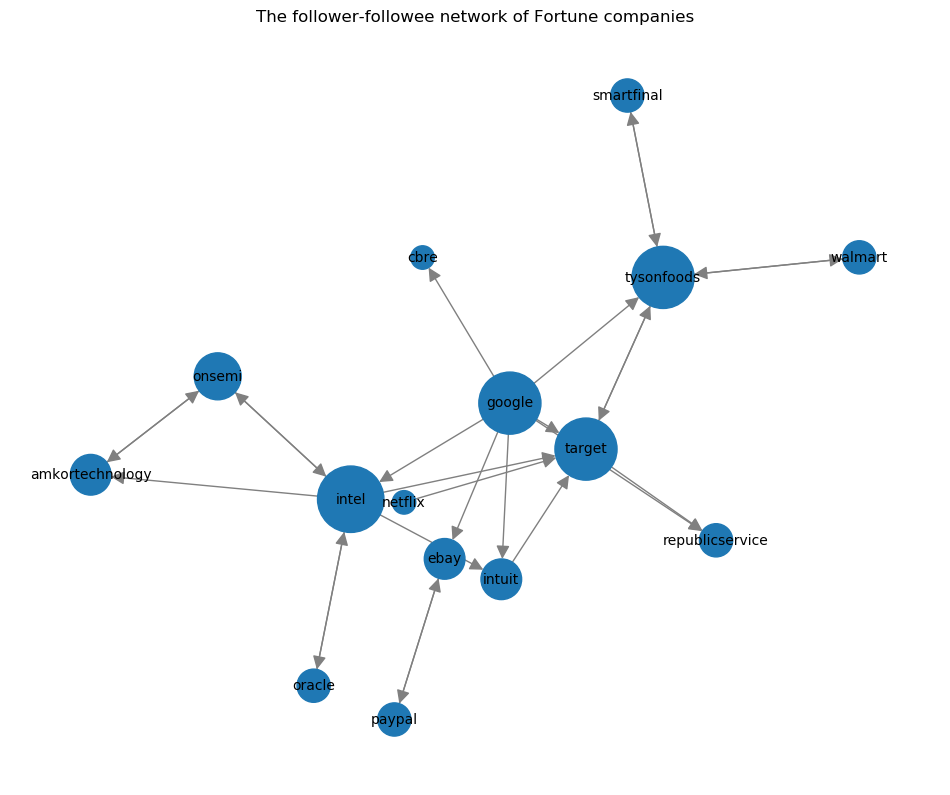

In [38]:
# Leaving the examples here
# Build a network from the adjacency matrix

# add your code here






### Fixing Q2 as mentioned

In [8]:
import math
# calculate centrality
# there are several centrality, but indegree centrality matches the example, so..
[x for x in nx.in_degree_centrality(G).items()]

# calculate constraint
[x for x in nx.constraint(G).items()]

# get the top accounts
# seveal of them are the greatest
sorted([x for x in nx.in_degree_centrality(G).items()],key=lambda x: -x[1])
sorted([x for x in nx.in_degree_centrality(G).items()],key=lambda x: -x[1])[0][0]

sorted([x for x in nx.constraint(G).items()],key=lambda x: -x[1],reverse=True)
for i in sorted([x for x in nx.constraint(G).items()],key=lambda x: -x[1],reverse=True):

    if math.isnan(i[1]):
        continue
    else:
        print(i[0])
        break


[('walmart', 0.07142857142857142),
 ('tysonfoods', 0.2857142857142857),
 ('republicservice', 0.14285714285714285),
 ('onsemi', 0.14285714285714285),
 ('amkortechnology', 0.14285714285714285),
 ('cbre', 0.07142857142857142),
 ('smartfinal', 0.07142857142857142),
 ('google', 0.0),
 ('ebay', 0.14285714285714285),
 ('intuit', 0.14285714285714285),
 ('intel', 0.21428571428571427),
 ('paypal', 0.07142857142857142),
 ('oracle', 0.07142857142857142),
 ('netflix', 0.0),
 ('target', 0.3571428571428571)]

[('walmart', 1.0),
 ('tysonfoods', 0.29071220324864633),
 ('republicservice', nan),
 ('onsemi', 0.7608506944444444),
 ('amkortechnology', 1.0069444444444444),
 ('cbre', nan),
 ('smartfinal', 1.0),
 ('google', 0.2812557846267758),
 ('ebay', 0.5555555555555556),
 ('intuit', 0.5408871882086166),
 ('intel', 0.33003826530612246),
 ('paypal', 1.0),
 ('oracle', 1.0),
 ('netflix', 1.0),
 ('target', 0.3208226317737979)]

[('target', 0.3571428571428571),
 ('tysonfoods', 0.2857142857142857),
 ('intel', 0.21428571428571427),
 ('republicservice', 0.14285714285714285),
 ('onsemi', 0.14285714285714285),
 ('amkortechnology', 0.14285714285714285),
 ('ebay', 0.14285714285714285),
 ('intuit', 0.14285714285714285),
 ('walmart', 0.07142857142857142),
 ('cbre', 0.07142857142857142),
 ('smartfinal', 0.07142857142857142),
 ('paypal', 0.07142857142857142),
 ('oracle', 0.07142857142857142),
 ('google', 0.0),
 ('netflix', 0.0)]

'target'

[('republicservice', nan),
 ('cbre', nan),
 ('google', 0.2812557846267758),
 ('tysonfoods', 0.29071220324864633),
 ('target', 0.3208226317737979),
 ('intel', 0.33003826530612246),
 ('intuit', 0.5408871882086166),
 ('ebay', 0.5555555555555556),
 ('onsemi', 0.7608506944444444),
 ('walmart', 1.0),
 ('smartfinal', 1.0),
 ('paypal', 1.0),
 ('oracle', 1.0),
 ('netflix', 1.0),
 ('amkortechnology', 1.0069444444444444)]

google


In [40]:
# Leaving the examples here
##### please compare it with result HW3-2 file
# calculate centrality


# calculate constraint


# get the top accounts



{'walmart': 0.07142857142857142,
 'tysonfoods': 0.2857142857142857,
 'republicservice': 0.14285714285714285,
 'onsemi': 0.14285714285714285,
 'amkortechnology': 0.14285714285714285,
 'cbre': 0.07142857142857142,
 'smartfinal': 0.07142857142857142,
 'google': 0.0,
 'ebay': 0.14285714285714285,
 'intuit': 0.14285714285714285,
 'intel': 0.21428571428571427,
 'paypal': 0.07142857142857142,
 'oracle': 0.07142857142857142,
 'netflix': 0.0,
 'target': 0.3571428571428571}

{'walmart': 1.0,
 'tysonfoods': 0.29071220324864633,
 'onsemi': 0.7608506944444444,
 'amkortechnology': 1.0069444444444444,
 'smartfinal': 1.0,
 'google': 0.2812557846267758,
 'ebay': 0.5555555555555556,
 'intuit': 0.5408871882086166,
 'intel': 0.33003826530612246,
 'paypal': 1.0,
 'oracle': 1.0,
 'netflix': 1.0,
 'target': 0.3208226317737979}

'target'

'tysonfoods'

### Bonus question:
 * Define a functionn to scrape the most recent (the recent week, but you can go beyond a bit if in one call you get a few) **original** (exclude retweets) tweets from multiple accouts.
 * For each tweet, grab "id","created_at","full_text","user.screen_name".
 * Make a dataframe and return the dataframe.
 * Use the function to get the original tweets of the top twp accounts from Q2. 


In [9]:
# scrape recent tweets
# didnt find any solution to deal with the missing 'created_at' data
# I have earse my own token
bearer_token = ""
client = tw.Client(bearer_token)
dict_list = []
for name in accounts:
    for tweet in tw.Paginator(client.search_recent_tweets, name,
                                  max_results=10).flatten(limit=250):
        tmp = []
        tmp.extend([tweet.id, tweet.created_at, tweet.text, name])
        dict_list.append(tmp)
recent = pd.DataFrame(dict_list[0:])
recent

,0,1,2,3
0,1501725656194895875,None,I finally found some liquid chlorophyll at Wal...,walmart
1,1501725639426068482,None,RT @GFuelEnergy: 🧡 𝙇𝙄𝙆𝙀 + 𝙍𝙏 to win a 4 PACK ...,walmart
2,1501725634153771010,None,RT @agustyeon: I don't know why this isn't bei...,walmart
3,1501725631024877571,None,Check out this $500 Walmart Gift Card Giveaway...,walmart
4,1501725600192425986,None,RT @drewdyck: One effect (at least for me) of ...,walmart
...,...,...,...,...
2979,1501725092908191745,None,@BLINKmf target kita cb sm ngalahin hylt,target
2980,1501725090702106624,None,"If Broncos TEs have a 20% target share, and Al...",target
2981,1501725088999219206,None,RT @5DTyler: Social Media “gurus” prey on peop...,target
2982,1501725086432256009,None,RT @lindyli: Putin bombed a maternity hospital...,target


In [42]:
# Leaving it here
# scrape recent tweets



,0,1,2,3
0,1494852783840931840,2022-02-19 01:54:11,"b""@andbreww if it's meant to be, it will be \x...",Target
1,1494851036447752196,2022-02-19 01:47:14,"b""@jckeperqlta it's true, i was the target""",Target
2,1494850452747440130,2022-02-19 01:44:55,b'@pricedemption my heart when yennefer: \xf0\...,Target
3,1494848243360010240,2022-02-19 01:36:08,"b'@RachiesArt the colors are giving monet, tbh'",Target
4,1494847186408034306,2022-02-19 01:31:56,"b'@jckeperqlta i have so many feelings, okay \...",Target
...,...,...,...,...
832,1472242890327875592,2021-12-18 16:30:32,b'We\xe2\x80\x99re honored to partner with @Wr...,TysonFoods
833,1471526727897780226,2021-12-16 17:04:46,b'@lejaz1 Hi \xe2\x80\x93 Thank you for bringi...,TysonFoods
834,1468981591749894148,2021-12-09 16:31:18,b'@missfab_ @kroger Hi \xe2\x80\x93 Thank you ...,TysonFoods
835,1468265635134287883,2021-12-07 17:06:21,b'@thelaughbarrel Hi \xe2\x80\x93 Thank you fo...,TysonFoods
